In [1]:
# IMPORTING BASE LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**EXPLORATORY ANALYSIS**

In [2]:
# READING THE DATA

data = pd.read_csv("/kaggle/input/us-patent-phrase-to-phrase-matching/train.csv")
data.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


In [3]:
# CHECKING FOR BASIC INFO OF THE DATA

def description(data):
    
    print("Shape of data is:", data.shape)
    print("\nData Types are as follows:")
    print(data.dtypes)
    print("\nNumber of null values are as follows:")
    print(data.isna().sum())
    print("\nNumber of unique values in each column are as follows:")
    print(data.nunique())
    print("\n")
    
description(data)

Shape of data is: (36473, 5)

Data Types are as follows:
id          object
anchor      object
target      object
context     object
score      float64
dtype: object

Number of null values are as follows:
id         0
anchor     0
target     0
context    0
score      0
dtype: int64

Number of unique values in each column are as follows:
id         36473
anchor       733
target     29340
context      106
score          5
dtype: int64




In [4]:
# DOING SOME BASIC PREPROCESSING ON THE DATA

def preprocess(data):
    
    data.drop(["id", "context"], axis = 1, inplace = True)
    data = data.iloc[:5000]
    data.rename(columns = {'anchor':"Anchor", "target":"Target", "score":"Score"}, inplace = True)
    data.drop_duplicates(inplace = True)

    return data

data = preprocess(data)
data.head()

,Anchor,Target,Score
0,abatement,abatement of pollution,0.50
1,abatement,act of abating,0.75
2,abatement,active catalyst,0.25
3,abatement,eliminating process,0.50
4,abatement,forest region,0.00


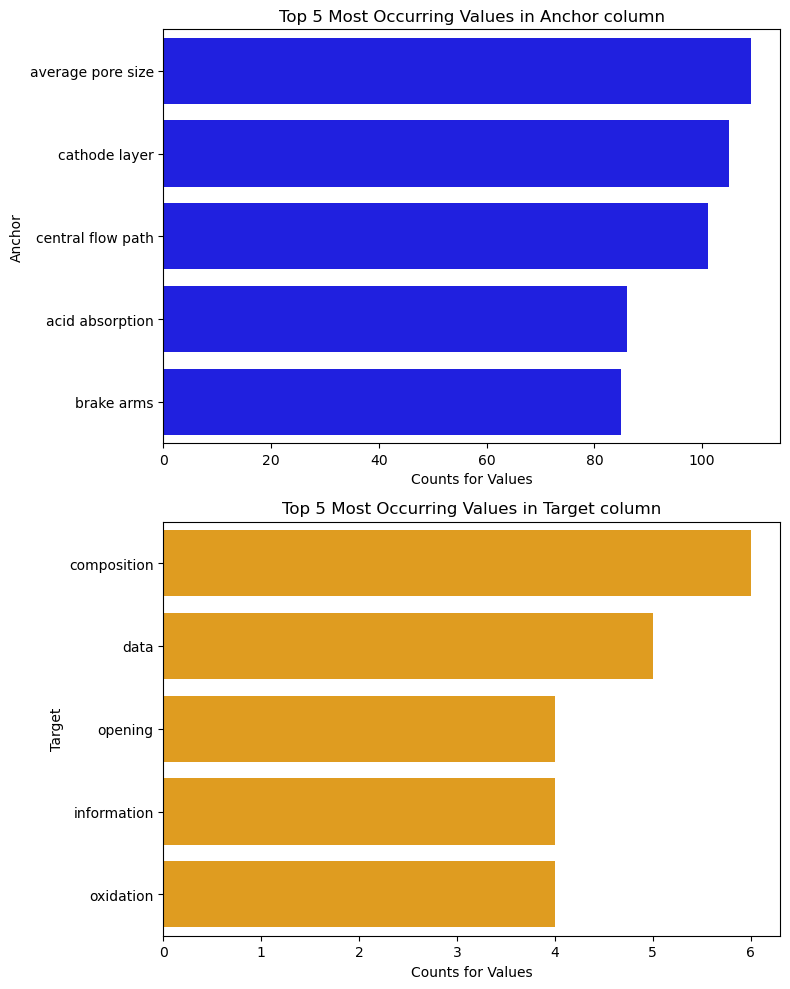

In [33]:
# GETTING TOP 5 MOST OCCURING VALUES IN BOTH COLS

import matplotlib.pyplot as plt
import seaborn as sns

counts_anchor = data['Anchor'].value_counts().head(5)
counts_target = data['Target'].value_counts().head(5)

fig, axs = plt.subplots(2, 1, figsize=(8, 10))

sns.barplot(ax=axs[0], y=counts_anchor.index, x=counts_anchor.values, color='blue')
axs[0].set_ylabel('Anchor')
axs[0].set_xlabel('Counts for Values')
axs[0].set_title('Top 5 Most Occurring Values in Anchor column')

sns.barplot(ax=axs[1], y=counts_target.index, x=counts_target.values, color='orange')
axs[1].set_ylabel('Target')
axs[1].set_xlabel('Counts for Values')
axs[1].set_title('Top 5 Most Occurring Values in Target column')

plt.tight_layout()
plt.show()

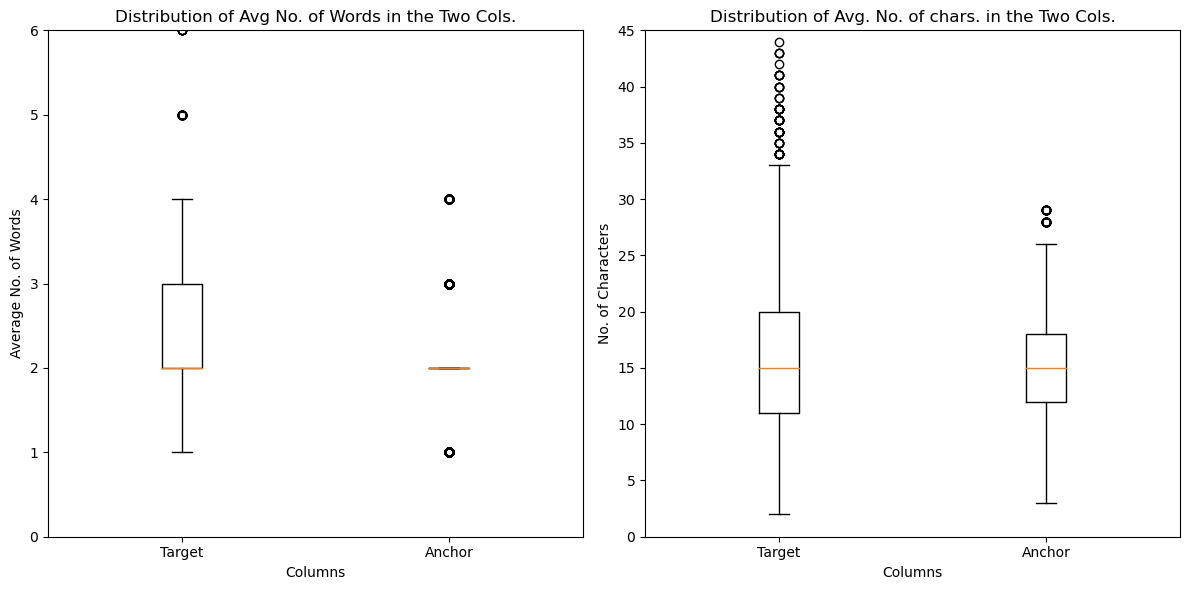

In [34]:
# DISTIRBUTION OF AVERAGE NO. OF WORDS, AND AVG. NO. OF CHARS. IN THE 2 COLS.

target_words = data['Target'].apply(lambda x: len(x.split()))
anchor_words = data['Anchor'].apply(lambda x: len(x.split()))
target_chars = data['Target'].apply(len)
anchor_chars = data['Anchor'].apply(len)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].boxplot([target_words, anchor_words])
axs[0].set_xticklabels(['Target', 'Anchor'])
axs[0].set_xlabel('Columns')
axs[0].set_ylabel('Average No. of Words')
axs[0].set_title('Distribution of Avg No. of Words in the Two Cols.')
axs[0].set_ylim(0, 6)

axs[1].boxplot([target_chars, anchor_chars])
axs[1].set_xticklabels(['Target', 'Anchor'])
axs[1].set_xlabel('Columns')
axs[1].set_ylabel('No. of Characters')
axs[1].set_title('Distribution of Avg. No. of chars. in the Two Cols.')
axs[1].set_ylim(0, 45)

plt.tight_layout()
plt.show()

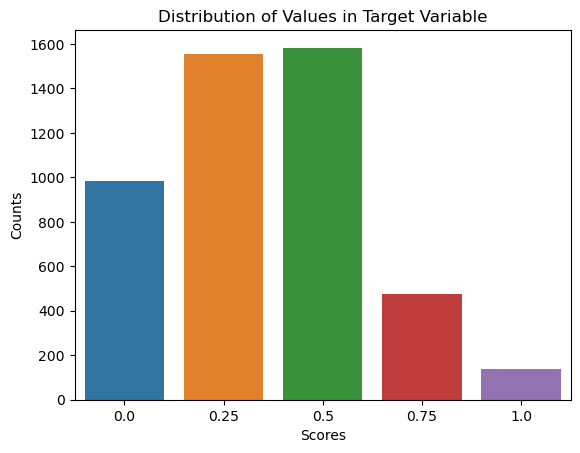

In [35]:
# PLOTTING HOW VALUES ARE DISTIRBUTED IN TARGET VARIABLE

sns.countplot(data=data, x='Score')
plt.xlabel('Scores')
plt.ylabel('Counts')
plt.title('Distribution of Values in Target Variable')
plt.show()

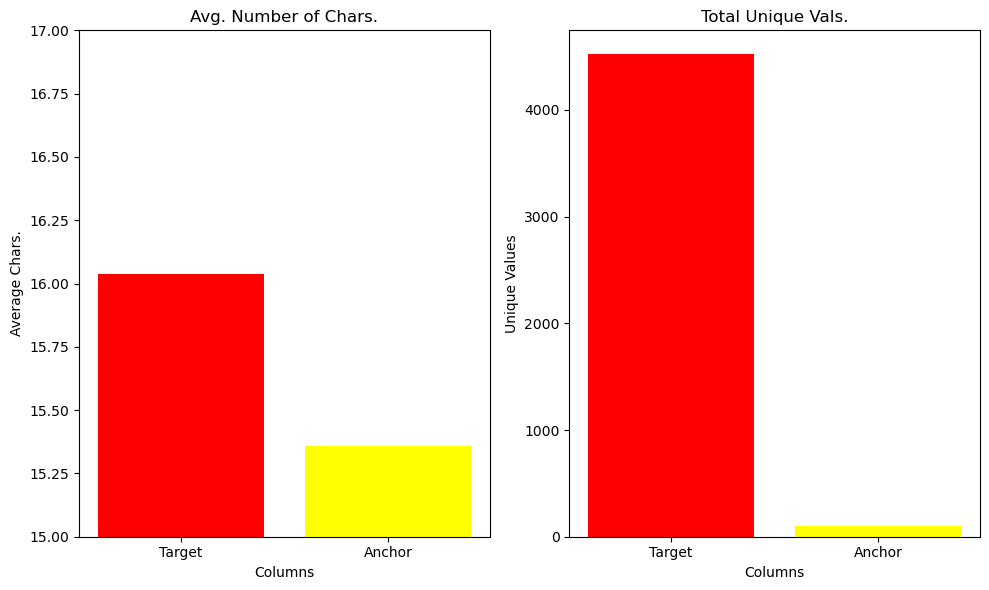

In [36]:
# COMPARING 2 COLS WITH RESPECT TO TOTAL UNIQUE VALUES AND AVERAGE CHARACTERS

avg_target = data['Target'].apply(len).mean()
avg_anchor = data['Anchor'].apply(len).mean()

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].bar(['Target', 'Anchor'], [avg_target, avg_anchor], color=['red', 'yellow'])
axs[0].set_xlabel('Columns')
axs[0].set_ylabel('Average Chars.')
axs[0].set_title('Avg. Number of Chars.')
axs[0].set_ylim(15, 17)

axs[1].bar(['Target', 'Anchor'], [len(data['Target'].unique()), len(data['Anchor'].unique())], color=['red', 'yellow'])
axs[1].set_xlabel('Columns')
axs[1].set_ylabel('Unique Values')
axs[1].set_title('Total Unique Vals.')

plt.tight_layout()
plt.show()

**TEXT PREPROCESSING**

In [5]:
# INSTALLING PACKAGES FOR TEXT PREPROCESSING

%pip install nltk
%pip install textacy
import nltk
nltk.download("corpus")

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.3/320.3 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.5 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.
[nltk_data] Error loading corpus: Package 'corpus' not found in index


False

In [7]:
# IMPORTING LIBRARIES REQUIRED FOR TEXT PREPROCESSING

import nltk
from nltk.corpus import stopwords
stopwords = [stopwords.words('english')]
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
from textacy import preprocessing

In [8]:
# CLEANING THE TEXT

def preprocess_text(data, column):
    
    # CONVERTING THE TEXT TO LOWERCASE
    data[column] = data[column].str.lower()
    
    # REMOVING THE STOPWORDS
    data[column] = data[column].apply(lambda x: ' '.join([i for i in x.split() if i not in stopwords]))
    
    # REMOVING EXTRA PUNCTUATIONS
    data[column] = data[column].apply(lambda x: preprocessing.remove.punctuation(x))
    
    # NORMALIZING WHITESPACES
    data[column] = data[column].apply(lambda x: preprocessing.normalize.whitespace(x))
    
    # REMOVING HASHTAGS
    data[column] = data[column].apply(lambda x: preprocessing.replace.hashtags(x))
    
    # STEMMING THE WORDS TO ROOT FORM
    data[column] = data[column].apply(lambda x: stemmer.stem(x))
    
    return data

data = preprocess_text(data, 'Target')
data = preprocess_text(data, 'Anchor')
data.head()

,Anchor,Target,Score
0,abat,abatement of pollut,0.50
1,abat,act of ab,0.75
2,abat,active catalyst,0.25
3,abat,eliminating process,0.50
4,abat,forest region,0.00


**APPLYING SIMILARITY MEASURES**

In [19]:
# INSTALLING LEVENSHTEIN DIST.

!pip install python-Levenshtein
from Levenshtein import distance as lev

In [20]:
# APPLYING LEVENSHTEIN SIMILARITY TO THE COLS

from Levenshtein import ratio

lev_sim_vals  = []

for a, t in zip(data["Anchor"], data["Target"]):
    lev_similarity = ratio(a, t)
    lev_sim_vals.append(lev_similarity)

In [22]:
# CHECKING THE LEVENSHTEIN SIMILARITY SCORES

lev_sim_vals[:20]

[0.34782608695652173,
 0.3076923076923077,
 0.3157894736842105,
 0.17391304347826086,
 0.11764705882352944,
 0.11111111111111116,
 0.1333333333333333,
 0.19047619047619047,
 0.0,
 0.18181818181818177,
 0.22857142857142854,
 0.125,
 0.4444444444444444,
 0.25806451612903225,
 0.09999999999999998,
 0.6153846153846154,
 0.33333333333333337,
 0.17391304347826086,
 0.4285714285714286,
 0.6666666666666667]

In [23]:
# INSTALLING LIBRARIES NEEDED FOR JACCARD SIMILARITY

!pip install Distance

import distance

distance.jaccard("decide", "resize")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Distance: filename=Distance-0.1.3-py3-none-any.whl size=16275 sha256=2bcabda98c576356b2c1fa98804a75b221f1780d7b7b494fe444300ef0c281ba
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built Distance


0.7142857142857143

In [25]:
# APPLYING JACCARD SIMILARITY TO OUR DATA

jac_sim_vals  = []

for a, t in zip(data["Anchor"], data["Target"]):
    jac_sim = distance.jaccard(a, t)
    jac_sim_vals.append(jac_sim)

In [27]:
# CHECKING THE CALCULATED JACCARD SIMILARITY VALUES

jac_sim_vals[:20]

[0.75,
 0.5714285714285714,
 0.8181818181818181,
 0.8666666666666667,
 0.9166666666666666,
 0.9166666666666666,
 0.9090909090909091,
 0.8333333333333334,
 1.0,
 0.8461538461538461,
 0.8,
 0.9230769230769231,
 0.7,
 0.7857142857142857,
 0.9285714285714286,
 0.5714285714285714,
 0.7272727272727273,
 0.8235294117647058,
 0.6666666666666667,
 0.4]

In [15]:
# INSTALLING LIBRARIES NEEDED TO CALCULATE JARO WINKLER SIMILARITY

!pip install jellyfish

In [17]:
# GETTING JARO WINKLER SIMILARITY BETWEEN THE COLUMNS

import jellyfish

jaro_winksim = data.apply(lambda data: jellyfish.jaro_winkler(data['Target'], data['Anchor']), axis=1)

In [18]:
# CHECKING THE JARO WINKLER SIMILARITIES

jaro_winksim

0       0.842105
1       0.574074
2       0.538889
3       0.535088
4       0.442308
          ...   
4994    0.614260
4995    0.356209
4996    0.683240
4997    0.743613
4998    0.647993
Length: 4732, dtype: float64

In [9]:
# INSTALLING LIBRARIES NEEDED FFOR UNIVERSAL SENTENCE ENCODER

!pip install tensorflow tensorflow-hub

In [10]:
# APPLYING PRE TRAINED UNIVERSAL SENTENCE ENMBEDDINGS TO GET EMBEDDINGS FOR OUR 2 COLS.

import tensorflow as tf
import tensorflow_hub as hub

use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") 

anchor_embeddings = use_model(data['Anchor'].tolist())
target_embeddings = use_model(data['Target'].tolist())

In [11]:
# CHECKING OUT OUR EMBEDDINGS CREATED FOR ANCHOR COL.

anchor_embeddings[:10]

<tf.Tensor: shape=(10, 512), dtype=float32, numpy=
array([[-0.02189193,  0.05340824,  0.0523088 , ..., -0.0592946 ,
         0.06848225, -0.08022794],
       [-0.02189193,  0.05340824,  0.0523088 , ..., -0.0592946 ,
         0.06848225, -0.08022794],
       [-0.02189193,  0.05340824,  0.0523088 , ..., -0.0592946 ,
         0.06848225, -0.08022794],
       ...,
       [-0.02189193,  0.05340824,  0.0523088 , ..., -0.0592946 ,
         0.06848225, -0.08022794],
       [-0.02189193,  0.05340824,  0.0523088 , ..., -0.0592946 ,
         0.06848225, -0.08022794],
       [-0.02189193,  0.05340824,  0.0523088 , ..., -0.0592946 ,
         0.06848225, -0.08022794]], dtype=float32)>

In [13]:
# CALCULATING NORMALISED COSINE SIMILARITY BETWEEN THE UNIVERSAL SENTENCE ENCODED EMBEDDINGS

USE_cosine_sim = tf.keras.losses.cosine_similarity(anchor_embeddings, target_embeddings)
USE_cosine_sim = 0.5 * (USE_cosine_sim + 1.0)
use_similarity = []
use_sim = np.array(USE_cosine_sim.numpy())

for i in use_sim:
    use_similarity.append(i)

In [14]:
# CHECKING THE COSINE SIMILARITIES BETWEEN THE TWO 'U.S.E.' EMBEDDINGS

use_similarity[:20]

[0.38275295,
 0.4450395,
 0.42984706,
 0.44715604,
 0.41179803,
 0.37739822,
 0.39816505,
 0.45837393,
 0.41687703,
 0.48562676,
 0.43672404,
 0.4136401,
 0.27106062,
 0.42000988,
 0.3906297,
 0.21263558,
 0.33657932,
 0.52110225,
 0.400167,
 0.23753548]

In [28]:
# CREATING A WORD2VEC MODEL FOR OUR DATA

from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_distances

corpus = data['Anchor'].tolist() + data['Target'].tolist()

w2v_model = Word2Vec([corpus], min_count=1, workers=1)

In [29]:
# CALCULATING THE WORD2VEC SIMILARITIES BETWEEN THE 2 COLUMNS

w2v_cos_dist = []

for anchor, target in zip(data['Anchor'], data['Target']):
    anchor_vec = w2v_model.wv[anchor]
    target_vec = w2v_model.wv[target]
    cosine_dist = cosine_distances([anchor_vec], [target_vec])[0][0]
    w2v_cos_dist.append(cosine_dist)

In [32]:
# CHECKING THE SIMILARITIES CALCULATED

w2v_cos_dist[:20]

[0.9950493,
 0.98871803,
 0.89141506,
 0.9257291,
 0.9936161,
 0.9590463,
 0.80242777,
 1.1221735,
 0.9894322,
 0.9996862,
 0.7682959,
 0.9816845,
 1.1940244,
 0.9882629,
 0.84695876,
 0.92580265,
 1.0076567,
 1.1175178,
 1.0274919,
 0.94037473]

In [33]:
# NORMALIZING THE SIMILARITIES BASED ON WORDWVEC EMBEDDINGS

min_d = min(w2v_cos_dist)
max_d = max(w2v_cos_dist)
w2vec_similarity = [(i - min_d) / (max_d - min_d) for i in w2v_cos_dist]

In [35]:
# CHECKING THE NORMALISED WORD2VEC SIMILARITIES 

w2vec_similarity[:20]

[0.72812194,
 0.72348905,
 0.65228814,
 0.67739725,
 0.7270732,
 0.7017769,
 0.58717215,
 0.8211444,
 0.72401166,
 0.73151493,
 0.5621964,
 0.7183423,
 0.87372094,
 0.72315603,
 0.6197575,
 0.6774511,
 0.7373473,
 0.81773764,
 0.75186163,
 0.6881141]

In [36]:
# ADDING THE SIMILARITIES CREATED AS NEW COLUMNS IN THE DATAFRAME

data['Levenshtein_Dist'] = lev_sim_vals
data['Jaccard_Similarity'] = jac_sim_vals
data['Jaro_Winkler'] = jaro_winksim
data['Universal_Sent_Emb'] = use_similarity
data['Word2Vec_based_Embed'] = w2vec_similarity
data.head()

,Anchor,Target,Score,Levenshtein_Dist,Jaccard_Similarity,Jaro_Winkler,Universal_Sent_Emb,Word2Vec_based_Embed
0,abat,abatement of pollut,0.50,0.347826,0.750000,0.842105,0.382753,0.728122
1,abat,act of ab,0.75,0.307692,0.571429,0.574074,0.445040,0.723489
2,abat,active catalyst,0.25,0.315789,0.818182,0.538889,0.429847,0.652288
3,abat,eliminating process,0.50,0.173913,0.866667,0.535088,0.447156,0.677397
4,abat,forest region,0.00,0.117647,0.916667,0.442308,0.411798,0.727073


In [39]:
# ROUNDING OFF VALUES FOR THE COLUMNS TO THE NEAREST QUARTER

def round_vals(value):
    rounded_val = round(value * 4) / 4
    return rounded_val

data['Levenshtein_Dist'] = data['Levenshtein_Dist'].apply(round_vals)
data['Jaccard_Similarity'] = data['Jaccard_Similarity'].apply(round_vals)
data['Jaro_Winkler'] = data['Jaro_Winkler'].apply(round_vals)
data['Universal_Sent_Emb'] = data['Universal_Sent_Emb'].apply(round_vals)
data['Word2Vec_based_Embed'] = data['Word2Vec_based_Embed'].apply(round_vals)

data.head()

,Anchor,Target,Score,Levenshtein_Dist,Jaccard_Similarity,Jaro_Winkler,Universal_Sent_Emb,Word2Vec_based_Embed
0,abat,abatement of pollut,0.50,0.25,0.75,0.75,0.5,0.75
1,abat,act of ab,0.75,0.25,0.50,0.50,0.5,0.75
2,abat,active catalyst,0.25,0.25,0.75,0.50,0.5,0.75
3,abat,eliminating process,0.50,0.25,0.75,0.50,0.5,0.75
4,abat,forest region,0.00,0.00,1.00,0.50,0.5,0.75


In [41]:
# CREATING A NEW COLUMN WHICH IS AN AVERAGE OF THE 5 COLS.

data['Ensemble'] = (data['Word2Vec_based_Embed']+data['Universal_Sent_Emb']+data['Jaro_Winkler']+data['Jaccard_Similarity']+data['Levenshtein_Dist'])/5
data['Ensemble'] = data['Ensemble'].apply(round_vals)
data.head()

,Anchor,Target,Score,Levenshtein_Dist,Jaccard_Similarity,Jaro_Winkler,Universal_Sent_Emb,Word2Vec_based_Embed,Ensemble
0,abat,abatement of pollut,0.50,0.25,0.75,0.75,0.5,0.75,0.5
1,abat,act of ab,0.75,0.25,0.50,0.50,0.5,0.75,0.5
2,abat,active catalyst,0.25,0.25,0.75,0.50,0.5,0.75,0.5
3,abat,eliminating process,0.50,0.25,0.75,0.50,0.5,0.75,0.5
4,abat,forest region,0.00,0.00,1.00,0.50,0.5,0.75,0.5


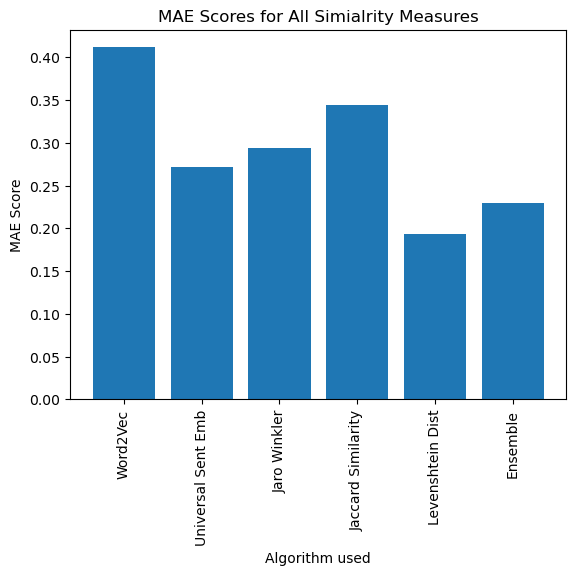

In [54]:
# EVALUATING AVG SIMILARITY SCORE BY WHICH MODELS GET PREDICTIONS WRONG (USING MEAN ABSOLUTE ERROR)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

mae_word2vec = mean_absolute_error(data['Score'], data['Word2Vec_based_Embed'])
mae_universal_sent = mean_absolute_error(data['Score'], data['Universal_Sent_Emb'])
mae_jaro_winkler = mean_absolute_error(data['Score'], data['Jaro_Winkler'])
mae_jaccard = mean_absolute_error(data['Score'], data['Jaccard_Similarity'])
mae_levenshtein = mean_absolute_error(data['Score'], data['Levenshtein_Dist'])
mae_ensemble = mean_absolute_error(data['Score'], data['Ensemble'])

mae_scores = [mae_word2vec, mae_universal_sent, mae_jaro_winkler, mae_jaccard, mae_levenshtein, mae_ensemble]
column_names = ['Word2Vec', 'Universal Sent Emb', 'Jaro Winkler', 'Jaccard Similarity', 'Levenshtein Dist', 'Ensemble']

plt.bar(column_names, mae_scores)
plt.xlabel('Algorithm used')
plt.ylabel('MAE Score')
plt.title('MAE Scores for All Simialrity Measures')
plt.xticks(rotation=90)
plt.show()